In [25]:
library(dplyr)
library(tidyverse)
library(ggrepel)
library(RColorBrewer)
library(gridExtra)
library(plyr)

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following object is masked from ‘package:matrixStats’:

    count


The following object is masked from ‘package:IRanges’:

    desc


The following object is masked from ‘package:S4Vectors’:

    rename


The following object is masked from ‘package:purrr’:

    compact


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize




In [5]:
code.dir <- getwd()

## 0. Define Plotting Function

In [6]:
scatterplot <- function(in.tb, color.type, cols, use.title, use.leg=TRUE, dotsize=0.2, dotalpha=0.3){
    
    sc.plot <- ggplot(in.tb, aes(x=x, y=y, color=get(color.type))) +
    geom_point(size=dotsize, alpha=dotalpha) +
    geom_point(size=dotsize, alpha=0.8, shape=21) +
    scale_colour_manual(values = cols) +
    scale_x_continuous(limits = c(xmin, xmax), expand = c(0, 0)) +
    scale_y_continuous(limits = c(ymin, ymax), expand = c(0, 0)) +
    labs(color=color.type)+
    ggtitle(use.title) +
    theme(plot.title = element_text(hjust = 0.5),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(),
          axis.title.x=element_blank(),
          axis.text.x=element_blank(),
          axis.title.y=element_blank(),
          axis.text.y=element_blank(),
          axis.line.x = element_blank(), #element_line(color="black", size = 0.25),
          axis.line.y = element_blank(), #element_line(color="black", size = 0.25),
          axis.ticks = element_blank() #legend.position="none"
          )
    
    if (!use.leg){
        sc.plot <- sc.plot + theme(legend.position="none")
    }
    return(sc.plot)
}


gradient_scatterplot <- function(in.tb, color.type, use.title, use.leg=TRUE, dotsize=0.2, dotalpha=0.3){
    
    sc.plot <- ggplot(in.tb, aes(x=x, y=y, color=get(color.type))) +
    geom_point(size=dotsize, alpha=dotalpha) +
    geom_point(size=dotsize, alpha=0.8, shape=21) +
    scale_x_continuous(limits = c(xmin, xmax), expand = c(0, 0)) +
    scale_y_continuous(limits = c(ymin, ymax), expand = c(0, 0)) +
    scale_colour_viridis_c() +
    labs(color=color.type)+
    ggtitle(use.title) +
    theme(plot.title = element_text(hjust = 0.5),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(),
          axis.title.x=element_blank(),
          axis.text.x=element_blank(),
          axis.title.y=element_blank(),
          axis.text.y=element_blank(),
          axis.line.x = element_blank(), #element_line(color="black", size = 0.25),
          axis.line.y = element_blank(), #element_line(color="black", size = 0.25),
          axis.ticks = element_blank() #legend.position="none"
          )
    
    if (!use.leg){
        sc.plot <- sc.plot + theme(legend.position="none")
    }
    return(sc.plot)
}

## 1. Data Import

In [7]:
###----- Working dir setup
setwd(code.dir)
wk.dir <- "../1_1_SCANPY_PAGA/all--numSlt-rmWTNAV/2_Scatterplot"
setwd(wk.dir)
  
###----- Input files
paga.out.dir <- "../../all--numSlt-rmWTNAV/0_PAGA/all--numSlt-rmWTNAV"
obs.file <- file.path(paga.out.dir, "obs.csv")
obsm.file <- file.path(paga.out.dir, "obsm.csv")
# Read input
obs.tb <- read_csv(obs.file)
obsm.tb <- read_csv(obsm.file)
obs.tb$x <- obsm.tb$X_draw_graph_fa1
obs.tb$y <- obsm.tb$X_draw_graph_fa2
# Unique clusters & cell types
louvain.uniq <- unique(obs.tb$louvain)
celltype.uniq <- unique(obs.tb$cell_type)
print(louvain.uniq)
print(celltype.uniq)
# Convert column to factor for plotting (keep order)
obs.tb$louvain <- as.factor(obs.tb$louvain)
obs.tb$cell_type <- factor(obs.tb$cell_type, levels=c("NP14B", "A5T", "A5P", "A8T", "A8P", "C5P", "C8P"))

# Plot range
xmin <- -76000
xmax <-  62000
ymin <- -46000
ymax <-  55000

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  cell_type = col_character(),
  n_genes = col_double(),
  percent_mito = col_double(),
  n_counts = col_double(),
  y_pred = col_logical(),
  use = col_character(),
  louvain = col_double(),
  dpt_pseudotime = col_double(),
  counts_per_gene = col_double()
)

Parsed with column specification:
cols(
  .default = col_double()
)

See spec(...) for full column specifications.



[1] 6 7 1 3 8 2 4 5 0
[1] "C8P"   "C5P"   "NP14B" "A8T"   "A8P"   "A5P"   "A5T"  


In [28]:
new.label.file <- '/Users/yolandatiao/GSuite\ Scripps/Exp391_Acute-Chronic_SC/9_Harmony/Exp391_newLabels.csv'
new.label.tb <- read_csv(new.label.file) %>% arrange(old_label)
print(new.label.tb)
obs.tb$louvain_newlabel <- mapvalues(as.numeric(obs.tb$louvain), from=c(1:nrow(new.label.tb)), to=new.label.tb$new_label)

Parsed with column specification:
cols(
  old_label = col_character(),
  new_label = col_character()
)



# A tibble: 9 x 2
  old_label new_label
  <chr>     <chr>    
1 L0        P3       
2 L1        P0       
3 L2        P8       
4 L3        P4       
5 L4        P5       
6 L5        P7       
7 L6        P6       
8 L7        P1       
9 L8        P2       


## 2. Generate plots

In [185]:
#--- All louvain clusters
plot.tb <- obs.tb 
use.type <- "louvain"
use.colors <- c( "firebrick2","gray", "goldenrod1", "darkturquoise","darkorange1",
                "mediumseagreen",  "royalblue1", "plum4", "deeppink1")
all.louvain.leg.plot <- scatterplot(plot.tb, use.type, use.colors, "PAGA initialized projection")

all.louvain.plot <-  all.louvain.leg.plot + theme(legend.position="none")

In [178]:
#--- Pseudotime order of clusters
plot.tb <- obs.tb 
use.type <- "dpt_pseudotime"
dpt.plot <- gradient_scatterplot(plot.tb, use.type,  "PAGA initialized projection")

In [150]:
#--- Naive
plot.tb <- obs.tb %>% 
  mutate(cell_type = ifelse(cell_type == "NP14B", "Yes", "No")) %>% 
  mutate(cell_type = factor(cell_type, levels = c("No", "Yes")))

use.type <- "cell_type"
use.colors <- c("gray", "red")
nav.plot <- scatterplot(plot.tb, use.type, use.colors, "Naive", FALSE)

In [151]:
#--- Arm Day5
# Tetramer
plot.tb <- obs.tb %>% 
  mutate(cell_type = ifelse(cell_type == "A5T", "Yes", "No")) %>% 
  mutate(cell_type = factor(cell_type, levels = c("No", "Yes")))

use.type <- "cell_type"
use.colors <- c("gray", "red")
a5t.plot <- scatterplot(plot.tb, use.type, use.colors, "Arm d5 Tet", FALSE)

# P14
plot.tb <- obs.tb %>% 
  mutate(cell_type = ifelse(cell_type == "A5P", "Yes", "No")) %>% 
  mutate(cell_type = factor(cell_type, levels = c("No", "Yes")))

use.type <- "cell_type"
use.colors <- c("gray", "red")
a5p.plot <- scatterplot(plot.tb, use.type, use.colors, "Arm d5 P14", FALSE)

In [152]:
#--- Arm Day8
# Tetramer
plot.tb <- obs.tb %>% 
  mutate(cell_type = ifelse(cell_type == "A8T", "Yes", "No")) %>% 
  mutate(cell_type = factor(cell_type, levels = c("No", "Yes")))

use.type <- "cell_type"
use.colors <- c("gray", "red")
a8t.plot <- scatterplot(plot.tb, use.type, use.colors, "Arm d8 Tet", FALSE)

# P14
plot.tb <- obs.tb %>% 
  mutate(cell_type = ifelse(cell_type == "A8P", "Yes", "No")) %>% 
  mutate(cell_type = factor(cell_type, levels = c("No", "Yes")))

use.type <- "cell_type"
use.colors <- c("gray", "red")
a8p.plot <- scatterplot(plot.tb, use.type, use.colors, "Arm d8 P14", FALSE)

In [153]:
#--- Clone 13
# Day 5
plot.tb <- obs.tb %>% 
  mutate(cell_type = ifelse(cell_type == "C5P", "Yes", "No")) %>% 
  mutate(cell_type = factor(cell_type, levels = c("No", "Yes")))

use.type <- "cell_type"
use.colors <- c("gray", "red")
c5p.plot <- scatterplot(plot.tb, use.type, use.colors, "Cl13 d5 P14", FALSE)

# Day 8
plot.tb <- obs.tb %>% 
  mutate(cell_type = ifelse(cell_type == "C8P", "Yes", "No")) %>% 
  mutate(cell_type = factor(cell_type, levels = c("No", "Yes")))

use.type <- "cell_type"
use.colors <- c("gray", "red")
c8p.plot <- scatterplot(plot.tb, use.type, use.colors, "Cl13 d8 P14", FALSE)

In [30]:
#--- All louvain
plot.tb <- obs.tb %>% 
  mutate(cell_type = ifelse(louvain_newlabel == "P0", "Yes", "No")) %>% 
  mutate(cell_type = factor(cell_type, levels = c("No", "Yes")))

use.type <- "cell_type"
use.colors <- c("gray", "red")
P0.plot <- scatterplot(plot.tb, use.type, use.colors, "P0", FALSE)

plot.tb <- obs.tb %>% 
  mutate(cell_type = ifelse(louvain_newlabel == "P1", "Yes", "No")) %>% 
  mutate(cell_type = factor(cell_type, levels = c("No", "Yes")))

use.type <- "cell_type"
use.colors <- c("gray", "red")
P1.plot <- scatterplot(plot.tb, use.type, use.colors, "P1", FALSE)

plot.tb <- obs.tb %>% 
  mutate(cell_type = ifelse(louvain_newlabel == "P2", "Yes", "No")) %>% 
  mutate(cell_type = factor(cell_type, levels = c("No", "Yes")))

use.type <- "cell_type"
use.colors <- c("gray", "red")
P2.plot <- scatterplot(plot.tb, use.type, use.colors, "P2", FALSE)

plot.tb <- obs.tb %>% 
  mutate(cell_type = ifelse(louvain_newlabel == "P3", "Yes", "No")) %>% 
  mutate(cell_type = factor(cell_type, levels = c("No", "Yes")))

use.type <- "cell_type"
use.colors <- c("gray", "red")
P3.plot <- scatterplot(plot.tb, use.type, use.colors, "P3", FALSE)

plot.tb <- obs.tb %>% 
  mutate(cell_type = ifelse(louvain_newlabel == "P4", "Yes", "No")) %>% 
  mutate(cell_type = factor(cell_type, levels = c("No", "Yes")))

use.type <- "cell_type"
use.colors <- c("gray", "red")
P4.plot <- scatterplot(plot.tb, use.type, use.colors, "P4", FALSE)

plot.tb <- obs.tb %>% 
  mutate(cell_type = ifelse(louvain_newlabel == "P5", "Yes", "No")) %>% 
  mutate(cell_type = factor(cell_type, levels = c("No", "Yes")))

use.type <- "cell_type"
use.colors <- c("gray", "red")
P5.plot <- scatterplot(plot.tb, use.type, use.colors, "P5", FALSE)

plot.tb <- obs.tb %>% 
  mutate(cell_type = ifelse(louvain_newlabel == "P6", "Yes", "No")) %>% 
  mutate(cell_type = factor(cell_type, levels = c("No", "Yes")))

use.type <- "cell_type"
use.colors <- c("gray", "red")
P6.plot <- scatterplot(plot.tb, use.type, use.colors, "P6", FALSE)

plot.tb <- obs.tb %>% 
  mutate(cell_type = ifelse(louvain_newlabel == "P7", "Yes", "No")) %>% 
  mutate(cell_type = factor(cell_type, levels = c("No", "Yes")))

use.type <- "cell_type"
use.colors <- c("gray", "red")
P7.plot <- scatterplot(plot.tb, use.type, use.colors, "P7", FALSE)

plot.tb <- obs.tb %>% 
  mutate(cell_type = ifelse(louvain_newlabel == "P8", "Yes", "No")) %>% 
  mutate(cell_type = factor(cell_type, levels = c("No", "Yes")))

use.type <- "cell_type"
use.colors <- c("gray", "red")
P8.plot <- scatterplot(plot.tb, use.type, use.colors, "P8", FALSE)

### Save Plots

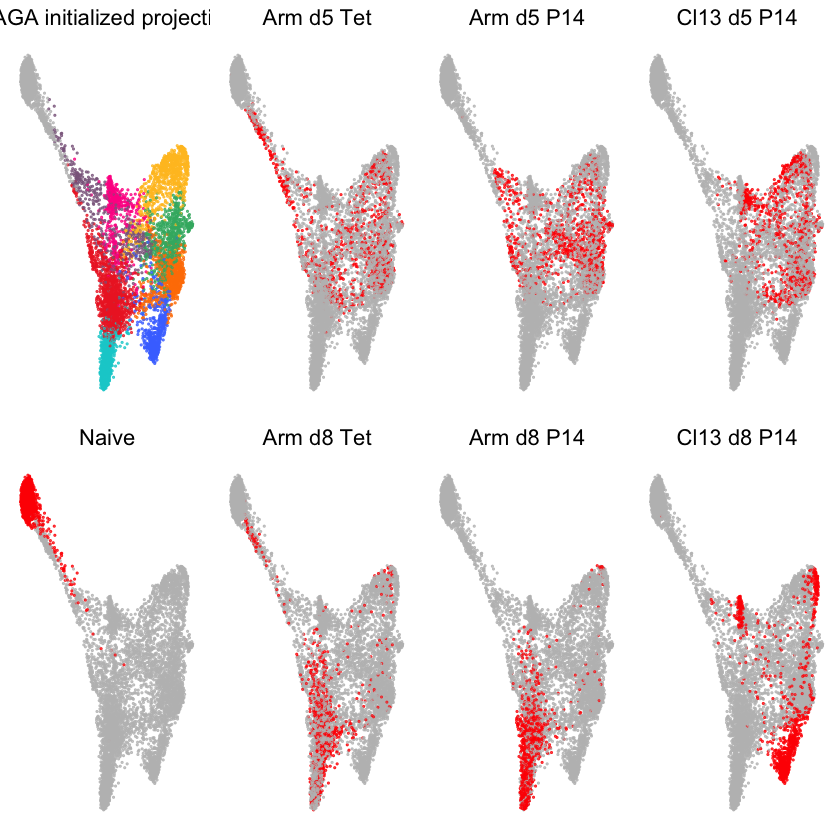

In [179]:
###----- Arranged plots
arr.plot.name <- "PAGA_initialized_plots.png"

arr.plots <- grid.arrange(all.louvain.plot, a5t.plot, a5p.plot, c5p.plot,
             nav.plot, a8t.plot, a8p.plot, c8p.plot, nrow=2)
ggsave(arr.plot.name, arr.plots, height=6, width=12)

In [192]:
###----- Pseudotime plot
plot.name <- "PAGA_initialized_pseudotime.png"

ggsave(plot.name, dpt.plot, height=3, width=4.2)

In [194]:
###----- All louvain clusters with legend
plot.name <- "PAGA_initialized_louvain.png"

ggsave(plot.name, all.louvain.leg.plot, height=3, width=3.5)

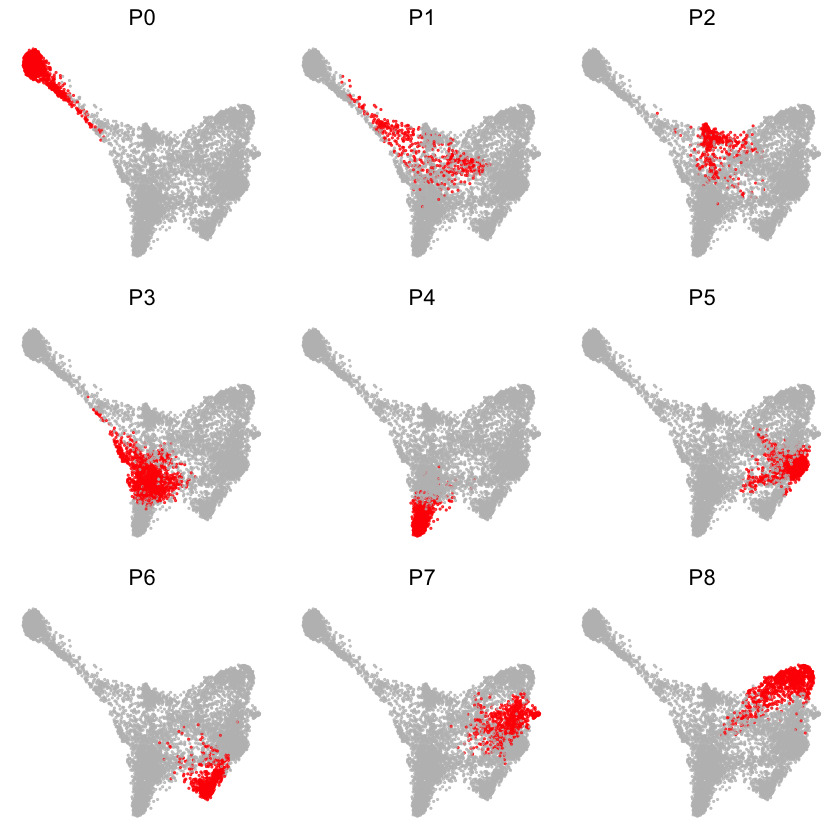

In [31]:
###----- Arranged plots for louvain
arr.plot.name <- "PAGA_initialized_plots_louvain.png"

arr.plots <- grid.arrange(P0.plot, P1.plot, P2.plot, 
                          P3.plot, P4.plot, P5.plot,
                          P6.plot, P7.plot, P8.plot, nrow=3)
ggsave(arr.plot.name, arr.plots, height=9, width=9)